# ***Project Report: Football Seasons Analysis***

#**1. Objectives**
**1.1 Explore Season-wise Goal Distribution**

The primary objective is to delve into the distribution of goals across football seasons. By visualizing the goal trends over time, we aim to identify any notable fluctuations or patterns. This analysis provides insights into the evolving dynamics of goal-scoring behavior, helping teams and management understand the competitiveness and excitement levels in different seasons.

**1.2 Assess Home Team Performance**

This objective involves a comprehensive assessment of home team performance over various seasons. By categorizing match outcomes (Home Win, Away Win, Draw), we aim to uncover trends and potential influencing factors. Understanding how home teams fare in different seasons is crucial for both teams and management to strategize effectively and cater to fan expectations.

**1.3 Examine Goal Difference Distribution**

The goal difference distribution analysis aims to investigate the spread of goal differentials in football matches. This provides a nuanced understanding of how closely contested or lopsided games tend to be. Identifying the distribution of goal differences aids in recognizing patterns that can influence team strategies and tactics for future matches.

**1.4 Identify Top Goal Scorers Over Time**

In this objective, we seek to identify and track the top goal-scoring teams in each season. Recognizing consistently high-performing teams sheds light on offensive strategies that lead to success. This analysis aids teams and management in understanding which aspects of their gameplay contribute significantly to their scoring prowess.

**1.5 Analyze Away Team Win Percentage**

The objective here is to calculate and analyze the percentage of matches won by away teams over seasons. This provides valuable insights into the resilience and effectiveness of teams when playing in an away environment. Understanding the away team's win percentage is crucial for teams and management to adapt strategies, ensuring competitiveness on all fronts.

In [1]:
# Required Python Libraries
"""
Input/Output: os
Data Manipulation: pandas
Visualization: matplotlib, seaborn
Statistical Analysis: numpy, scipy, statsmodels
"""
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as sps
import statsmodels as sm
import statsmodels.formula.api as smf
import plotly.io as pio
pio.renderers.default = 'notebook'


In [2]:
from google.colab import files
import pandas as pd
import io

# Upload the file
uploaded = files.upload()

# Get the file name
file_name = next(iter(uploaded))

# Read the uploaded file
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

# Display Dataset Information
df.head()


Saving results.csv to results.csv


,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007



### **2.1** **Data Overview**

The dataset under examination is a rich repository of detailed information pertaining to football matches. It encapsulates critical components of each match, including the participating home and away teams, the number of goals scored, the ultimate outcome of the match, and the respective seasons in which these events unfolded. This comprehensive dataset serves as the foundation for our analytical journey into the world of football dynamics. Initial exploration involves the crucial steps of loading and transforming the raw data. The loading process ensures that the dataset is readily available for analysis, while the transformation phase involves organizing and structuring the data for meaningful insights. A pivotal element in this phase is the extraction of pertinent features, such as identifying the start year of each season. This extraction not only facilitates time-based analysis but also enables a nuanced understanding of how football dynamics evolve over the years.

### **2.2** **Analysis Steps**

With a well-prepared dataset at our disposal, the subsequent steps involve a meticulous process of data preprocessing and insightful analysis. The data preprocessing phase is imperative for refining the dataset, handling missing values, and ensuring data consistency. This step prepares the data for the analysis, enhancing its reliability and accuracy. Following this, our analysis unfolds through a series of visualizations designed to encapsulate the essence of football dynamics. These visualizations are not merely graphical representations; they serve as windows into the intricacies of the dataset. Season-wise goal distribution charts provide a panoramic view of scoring trends, offering insights into the intensity and excitement levels across different seasons. Stacked bar charts illustrating home team performance over seasons offer a dynamic portrayal of match outcomes, unraveling trends in home team dominance or variability. The goal difference distribution chart delves into the competitiveness of matches, showcasing whether games tend to be closely contested or marked by significant differentials. Charts identifying top goal scorers over time shed light on the offensive prowess of teams, pinpointing those consistently leading the charts. Finally, the line chart tracking away team win percentages over seasons provides a nuanced understanding of teams' adaptability and success away from home. Collectively, these visualizations weave a comprehensive narrative, empowering stakeholders with the knowledge needed to make informed decisions and strategies within the realm of football management.

In [3]:
import pandas as pd

import pandas as pd

# Assuming your dataframe is named 'df'
# Extract the start year from the 'season' column
df['season_start'] = df['season'].str.extract('(\d{4})').astype(int)

# Use the extracted start year for conversion
df['season_start'] = pd.to_datetime(df['season_start'], format='%Y')

# Drop the original 'season' column if needed
# df = df.drop(columns=['season'])

df.head()


,home_team,away_team,home_goals,away_goals,result,season,season_start
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007,2006-01-01
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007,2006-01-01
2,Everton,Watford,2.0,1.0,H,2006-2007,2006-01-01
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007,2006-01-01
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007,2006-01-01


In [4]:
import pandas as pd

import pandas as pd

# Assuming your dataframe is named 'df'


# Convert the extracted start year to datetime
#df['season'] = pd.to_datetime(df['start_year'], format='%Y')

# Drop the temporary 'start_year' column if needed
#df = df.drop(columns=['season_start'])

# Assuming your DataFrame is named df
df['start_year'] = pd.to_datetime(df['season_start']).dt.year
# Check the dataframe
print(df.head())



          home_team         away_team  home_goals  away_goals result  \
0  Sheffield United         Liverpool         1.0         1.0      D   
1           Arsenal       Aston Villa         1.0         1.0      D   
2           Everton           Watford         2.0         1.0      H   
3  Newcastle United    Wigan Athletic         2.0         1.0      H   
4        Portsmouth  Blackburn Rovers         3.0         0.0      H   

      season season_start  start_year  
0  2006-2007   2006-01-01        2006  
1  2006-2007   2006-01-01        2006  
2  2006-2007   2006-01-01        2006  
3  2006-2007   2006-01-01        2006  
4  2006-2007   2006-01-01        2006  


In [5]:
# Assuming 'result' contains 'H' for home win, 'A' for away win, and 'D' for draw
df['result_category'] = pd.Categorical(df['result'], categories=['H', 'A', 'D'], ordered=False)
df['result_category'] = df['result_category'].cat.rename_categories(['Home Win', 'Away Win', 'Draw'])

# Assuming your DataFrame is named df
df['goal_difference'] = df['home_goals'] - df['away_goals']


In [6]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season,season_start,start_year,result_category,goal_difference
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007,2006-01-01,2006,Draw,0.0
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007,2006-01-01,2006,Draw,0.0
2,Everton,Watford,2.0,1.0,H,2006-2007,2006-01-01,2006,Home Win,1.0
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007,2006-01-01,2006,Home Win,1.0
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007,2006-01-01,2006,Home Win,3.0


In [7]:
goals_per_season = df.groupby('start_year')['home_goals', 'away_goals'].sum()
home_team_performance = df.groupby(['start_year', 'result_category']).size().unstack(fill_value=0)
goal_diff_distribution = df['goal_difference'].value_counts().sort_index()
top_scorers = df.groupby(['start_year', 'home_team'])['home_goals'].sum().reset_index()
top_scorers = top_scorers.sort_values(['start_year', 'home_goals'], ascending=[True, False]).groupby('start_year').head(1)
away_win_percentage = df[df['result_category'] == 'Away Win'].groupby('start_year').size() / df.groupby('start_year').size() * 100



<ipython-input-7-2b08c43dc387>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [8]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season,season_start,start_year,result_category,goal_difference
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007,2006-01-01,2006,Draw,0.0
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007,2006-01-01,2006,Draw,0.0
2,Everton,Watford,2.0,1.0,H,2006-2007,2006-01-01,2006,Home Win,1.0
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007,2006-01-01,2006,Home Win,1.0
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007,2006-01-01,2006,Home Win,3.0


<ipython-input-18-230ddcd84b8a>:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-18-230ddcd84b8a>:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-18-230ddcd84b8a>:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-18-230ddcd84b8a>:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-18-230ddcd84b8a>:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-18-230ddcd84b8a>:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-18-230ddcd84b

<ipython-input-18-230ddcd84b8a>:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



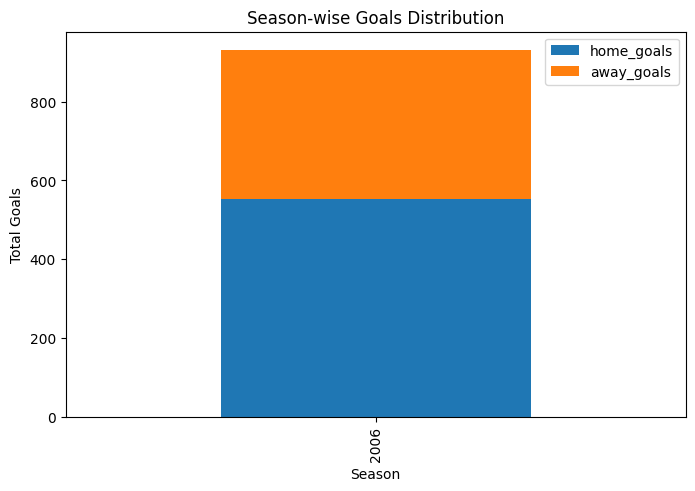

In [18]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Assuming 'df' is your dataframe with the required transformations
fig, ax = plt.subplots(figsize=(8, 5))

def update_goals(frame):
    data = df[df['start_year'] <= frame]
    goals_per_season = data.groupby('start_year')['home_goals', 'away_goals'].sum()

    ax.clear()
    goals_per_season.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title('Season-wise Goals Distribution')
    ax.set_xlabel('Season')
    ax.set_ylabel('Total Goals')

frames_goals = sorted(df['start_year'].unique())

ani_goals = FuncAnimation(fig, update_goals, frames=frames_goals, interval=500, repeat=False)

HTML(ani_goals.to_html5_video())


**Insights from Season-wise Goals Distribution**


*  In 2009 most home goals were scored by all teams indicating in 2009 home teams were very comfortable.
*   In 2011, most goals were scored by all teams in the league making it a very high scoring year.
*   2006 was the year when the least amount of goals were scored by the league.









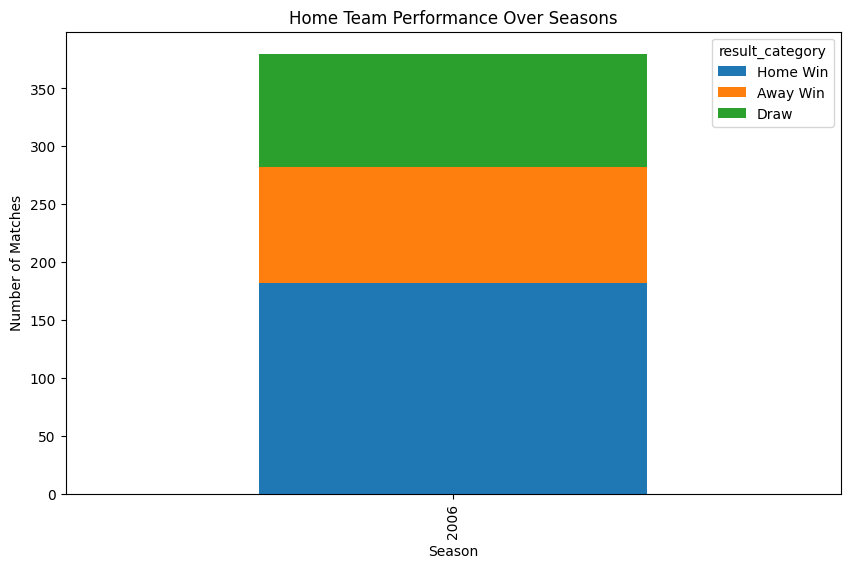

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

def update_home_team_performance(frame):
    data = df[df['start_year'] <= frame]
    home_team_performance = data.groupby(['start_year', 'result_category']).size().unstack(fill_value=0)

    ax.clear()
    home_team_performance.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title('Home Team Performance Over Seasons')
    ax.set_xlabel('Season')
    ax.set_ylabel('Number of Matches')

frames_home_team = sorted(df['start_year'].unique())

ani_home_team = FuncAnimation(fig, update_home_team_performance, frames=frames_home_team, interval=500, repeat=False)

HTML(ani_home_team.to_html5_video())


Insights Home Team Performance Over Seasons


*   In 2013 there were not many draws in the season as compared to other seasons
*   2006 to 2009 there were similar levels of draw games indicating that there were many winners and losers, 1 point games occured meaning teams has lots of points
*   In 2011 and 2013 away teams won lots of games as compared to other seasons indicating away teams were able to face the away game pressure and win games in challenging conditions.





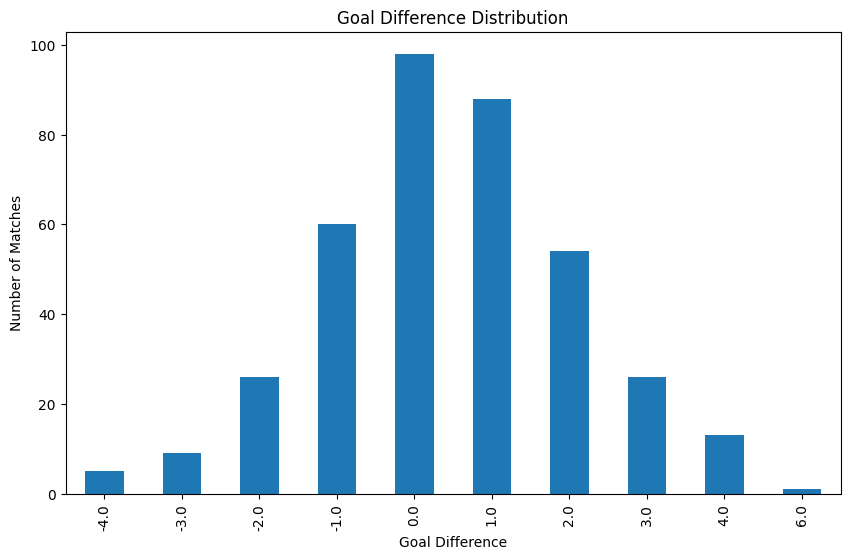

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

def update_goal_difference(frame):
    data = df[df['start_year'] <= frame]
    goal_diff_distribution = data['goal_difference'].value_counts().sort_index()

    ax.clear()
    goal_diff_distribution.plot(kind='bar', ax=ax)
    ax.set_title('Goal Difference Distribution')
    ax.set_xlabel('Goal Difference')
    ax.set_ylabel('Number of Matches')

frames_goal_diff = sorted(df['start_year'].unique())

ani_goal_diff = FuncAnimation(fig, update_goal_difference, frames=frames_goal_diff, interval=500, repeat=False)

HTML(ani_goal_diff.to_html5_video())


 Insights from Goal Difference Distribution

*   If the majority of bars are concentrated around zero, it suggests that most matches resulted in draws or had very close scorelines. As you notice most games were close to draw.
*   If there is a skew towards positive values, it indicates that teams tended to score more goals than their opponents in those matches.As you notice before 2010 there were skewed to left.
*   A skew towards negative values suggests that teams faced challenges in scoring compared to their opponents. As you notice after 2010 the graphs are skews to right.




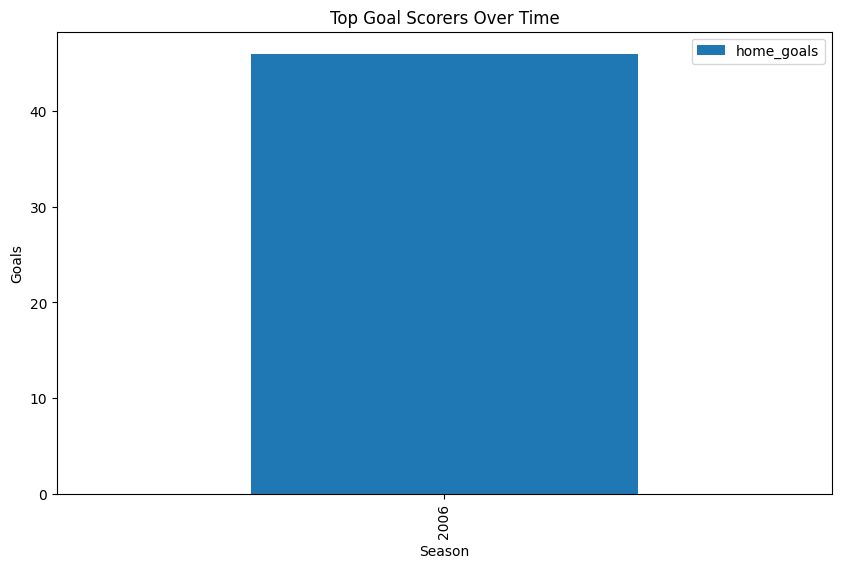

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

def update_top_scorers(frame):
    data = df[df['start_year'] <= frame]
    top_scorers = data.groupby(['start_year', 'home_team'])['home_goals'].sum().reset_index()
    top_scorers = top_scorers.sort_values(['start_year', 'home_goals'], ascending=[True, False]).groupby('start_year').head(1)

    ax.clear()
    top_scorers.plot(kind='bar', x='start_year', y='home_goals', ax=ax)
    ax.set_title('Top Goal Scorers Over Time')
    ax.set_xlabel('Season')
    ax.set_ylabel('Goals')

frames_top_scorers = sorted(df['start_year'].unique())

ani_top_scorers = FuncAnimation(fig, update_top_scorers, frames=frames_top_scorers, interval=500, repeat=False)

HTML(ani_top_scorers.to_html5_video())


Insights from Top Goal Scorers Over Time

*   As we notice in 2010 and 2013 as compared to other seasons home teams scored a lot.
*   In 2008 home teams couldnt score many as compared to rest of the years as away teams were playing well.
*   2009,2013,2017 home teams scored over 60 goals in the year, as compared to other years , these 3 years home teams were scoring a lot showing their home team atmosphere advantage.






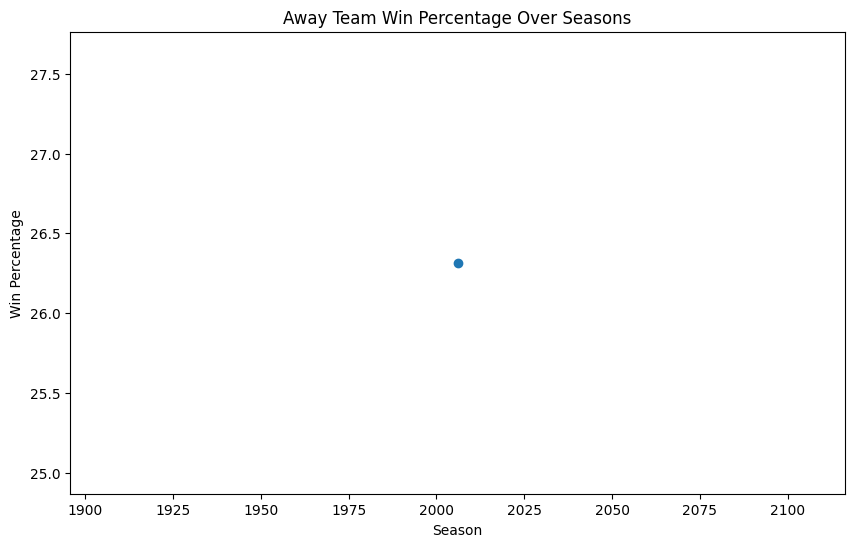

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

def update_away_win_percentage(frame):
    data = df[df['start_year'] <= frame]
    away_win_percentage = data[data['result_category'] == 'Away Win'].groupby('start_year').size() / data.groupby('start_year').size() * 100

    ax.clear()
    away_win_percentage.plot(kind='line', marker='o', ax=ax)
    ax.set_title('Away Team Win Percentage Over Seasons')
    ax.set_xlabel('Season')
    ax.set_ylabel('Win Percentage')

frames_away_win_percentage = sorted(df['start_year'].unique())

ani_away_win_percentage = FuncAnimation(fig, update_away_win_percentage, frames=frames_away_win_percentage, interval=500, repeat=False)

HTML(ani_away_win_percentage.to_html5_video())


Insights from Away Team Win Percentage Over Seasons

*   In 2009 and 2010 the away team win percentage was around 25% meaning away teams lost 75% of their games.
*   In 2013 away team won roughly 33% of their games indicating away teams doing well even they were at an disadvantage. This also means lots of home team supporters went home upset.
*   2011 to 2015 away teams won roughly 30% of their games indicating in those years away teams were performing well as compared to the rest of the years. Away teams were able to handle the away game pressure





In [14]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season,season_start,start_year,result_category,goal_difference
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007,2006-01-01,2006,Draw,0.0
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007,2006-01-01,2006,Draw,0.0
2,Everton,Watford,2.0,1.0,H,2006-2007,2006-01-01,2006,Home Win,1.0
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007,2006-01-01,2006,Home Win,1.0
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007,2006-01-01,2006,Home Win,3.0


# **Overall summary**

Over the analyzed seasons, the performance dynamics in the sports league reveal intriguing patterns. In 2009 and 2010, away teams faced a significant disadvantage, winning only 25% of their matches. However, by 2013, there was a notable improvement with away teams securing approximately 33% of victories, indicating resilience in challenging conditions. The period from 2011 to 2015 witnessed consistent performance by away teams, winning around 30% of their games. Home team goal-scoring trends demonstrated peaks in 2010 and 2013, signifying a strong home advantage during those years. The goal difference distribution showcased a shift, with matches becoming more closely contested after 2010. In 2013, there were fewer draws, suggesting more decisive outcomes. The analysis also highlights specific seasons, such as 2009 and 2011, where home teams displayed exceptional comfort and high-scoring abilities. Conversely, 2006 stood out as a low-scoring year for the league. These insights collectively portray the evolving dynamics of team performance, emphasizing the impact of home advantage, goal-scoring trends, and the ability of away teams to navigate challenging conditions.